# Extracted Ion

Given a known _m/z_, we can look at the extracted ion chromatogram (from liquid chromatography), extracted ion mobilogram (from ion mobility spectrometry), or both.

In [1]:
import deimos
import matplotlib.pyplot as plt

In [2]:
# Load data
ms1 = deimos.load('example_data.h5', key='ms1', columns=['mz', 'drift_time', 'retention_time', 'intensity'])

In [3]:
# Slice by mass
ss = deimos.slice(ms1, by='mz', low=204.1, high=204.2)

## Chromatogram

We can sum along _m/z_ and drift time dimensions to give only retention time, sort the values, and plot.

In [4]:
# Sum over mz, drift time
ss_rt = deimos.collapse(ss, keep='retention_time').sort_values(by='retention_time')

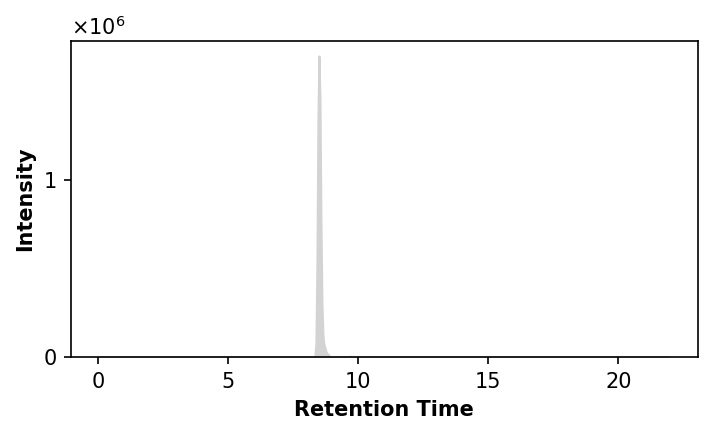

In [5]:
# Visualize
deimos.plot.fill_between(ss_rt['retention_time'], ss_rt['intensity'], 
                         xlabel='Retention Time', dpi=150)
plt.tight_layout()
plt.show()

## Mobilogram

Similarly, we can sum along _m/z_ and retention time dimensions to give only drift time, sort the values, and plot.

In [6]:
# Sum over mz, retention time
ss_dt = deimos.collapse(ss, keep='drift_time').sort_values(by='drift_time')

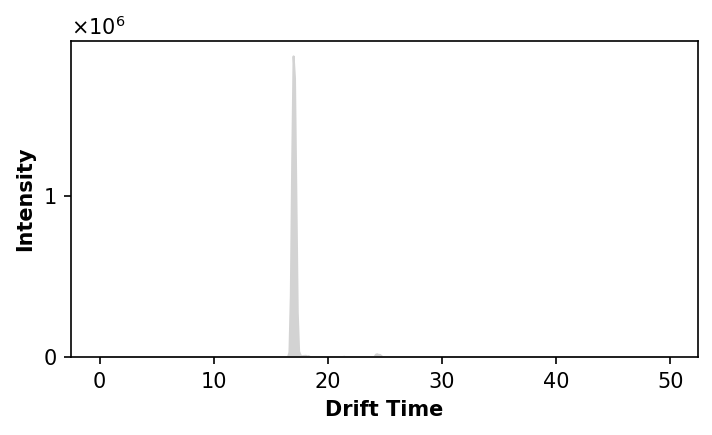

In [7]:
# Visualize
deimos.plot.fill_between(ss_dt['drift_time'], ss_dt['intensity'], 
                         xlabel='Drift Time', dpi=150)
plt.tight_layout()
plt.show()

## Chromatogram + Mobilogram

Even more useful in LC-IMS-MS, we can plot a two-dimensional extracted ion represenation by summing only across the _m/z_ dimension. 

In [8]:
# Sum over mz, retention time
ss_rt_dt = deimos.collapse(ss, keep=['retention_time', 'drift_time'])

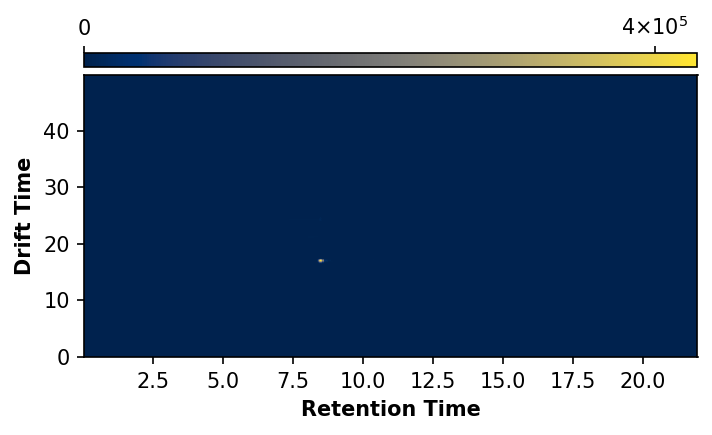

In [9]:
# Visualize
deimos.plot.grid(ss_rt_dt, dims=['retention_time', 'drift_time'],
                 method='nearest', gridsize=1000j, cmap='cividis', dpi=150)
plt.tight_layout()
plt.show()

The above is not particularly interesting by this representation, as there is only a single dominant feature for this _m/z_.
There are cases, however, wherein multiple features will appear in the 2D chromato-/mobilo- gram.